In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error, r2_score
from collections import Counter

import statsmodels.api as sm

In [35]:
# cal = pd.read_csv('calendar.csv.gz')
# listd = pd.read_csv('listings.csv.gz')
# lists = pd.read_csv('listings.csv')
# revs = pd.read_csv('reviews.csv.gz')
# nhood = pd.read_csv('neighbourhoods.csv')
purelst = pd.read_csv('listings.csv.gz')

In [36]:
# pd.set_option('display.max_colu?mns', 96)
pd.set_option('display.max_rows', 96)

In [37]:
import pickle
X_train= pd.read_pickle('pkls/rand_split/X_train.pkl')
y_train= pd.read_pickle('pkls/rand_split/y_train.pkl')
X_test= pd.read_pickle('pkls/rand_split/X_test.pkl')
y_test= pd.read_pickle('pkls/rand_split/y_test.pkl')

In [38]:
def my_metric(y_act,y_pred):
    r2_score= (1 - ((y_act-y_pred) ** 2).sum() / ((y_act-y_act.mean())**2).sum() )
#     print("My R2Score = ",r2_score)
    return(r2_score)

In [39]:
#### Prepare specific data for this notebook

In [40]:
linreg_cols=['bedrooms','bathrooms','accommodates','cleaning_fee','beds']
X_train.drop(linreg_cols,axis=1,inplace=True)
X_test.drop(linreg_cols,axis=1,inplace=True)
X_train.head().T

,3884,3945,3908,2273,3473
host_is_superhost,False,False,False,True,False
host_identity_verified,False,False,True,True,False
bed_type,True,True,True,True,True
guests_included,1,8,1,1,1
room_type_full,1,1,1,0,0
room_type_pvt,0,0,0,1,1
amentcnt,20,43,23,25,25
min_night_stay_long,0,0,0,0,0
min_night_stay_mid,0,0,0,0,0
ppt_condensed_apt,1,0,1,0,0


# Gradient Boost Regressor

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

# from sklearn.datasets import make_regression
# # X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls', 'random_state':0}

gbr = GradientBoostingRegressor(**params)
# gbr = GradientBoostingRegressor(max_depth=2, random_state=0)

gbr.fit(X_train, y_train)
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
#            oob_score=False, random_state=0, verbose=0, warm_start=False)



GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [42]:
y_predGBR = gbr.predict(X_test)
mse= mean_squared_error(y_test,y_predGBR)
print("MSE: %.4f" %mse)
print("My GBR Score : %.4f",my_metric(y_test,y_predGBR))

MSE: 36434.7983
My GBR Score : %.4f 0.23576561207961189


<BarContainer object of 44 artists>

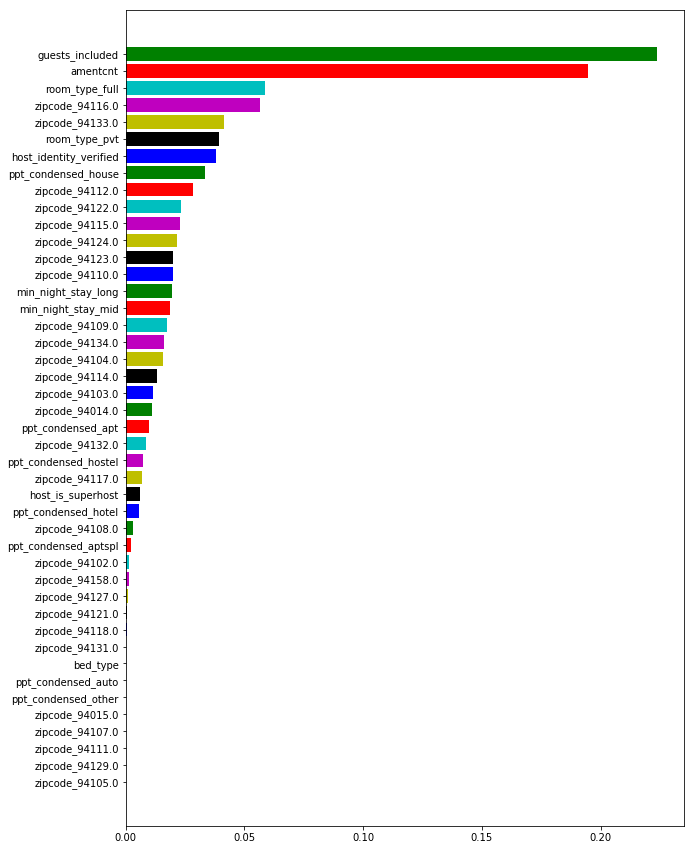

In [43]:
featurelist=X_train.columns
featureimp= gbr.feature_importances_

tmp_df=featurelist.to_frame(index=False)
tmp_df=tmp_df.rename(columns={0:'feature'})
tmp_df['prime']=featureimp
feature_df=tmp_df.sort_values(by=['prime'], ascending=True)

fig=plt.figure(figsize=(10,15))
ax1=fig.add_subplot(111)
ax1.barh(feature_df['feature'],feature_df['prime'],color='rgbkymc')

In [44]:
print(gbr.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

[99.31649779]


In [45]:
y_pred=gbr.predict(X_test)

gbr_score=gbr.score(X_test,y_test)
print("GBR Forest Score",gbr_score)

#Calculate the baseline errors
baseline = abs(y_test.mean()-y_test)
print("Baseline Absolute Error",np.mean(baseline))

#Calculate the absolute errors
residuals = abs(y_pred-y_test)
print("Mean Absolute Error",np.mean(residuals))

#Calculate Mean Absolute pct error
mape = (residuals/y_test)*100

#Accuracy 
accy=100-np.mean(mape)

#Mean Absolute Error 

print("Accuracy",round(accy,2), '%')

print("My R2 Score is : ",my_metric(y_test,y_pred))

GBR Forest Score 0.23576561207961189
Baseline Absolute Error 118.54777257380623
Mean Absolute Error 85.38362076766148
Accuracy 51.6 %
My R2 Score is :  0.23576561207961189


In [46]:
y_pred

array([120.95048633, 177.94465662, 446.31797924, 448.47802912,
       171.25403729, 306.9955542 , 216.53490249, 224.41059714,
       147.21883201, 127.7575095 , 457.36202492, 262.34256802,
       621.70599269, 248.22160411,  59.58202732, 316.43578522,
       317.794269  , 244.49967775, 199.52847319,  98.69813881,
       312.40684386, 373.81567469, 134.64738711, 187.53133651,
       144.50909012, 300.88624045, 103.59515242, 140.31568394,
       256.20874848, 128.48978756, 122.28984858, 425.96804941,
       122.79122013, 115.68398667, 155.48646418, 268.54172584,
       164.14881359, 261.9319186 , 324.25258574, 219.13314554,
       115.68398667, 304.42166091, 232.97907434, 219.32063655,
       238.85938672, 408.03848023, 206.50329352,  90.23911538,
       116.32558861, 143.14158891, 366.89746929, 123.58084834,
       847.16155842, 196.37568959, 282.9508837 , 127.00751193,
       249.60014621, 198.27605898, 269.77742951, 137.254775  ,
       307.17738196, 243.83765875, 141.31795045, 350.59

In [47]:
#Building Residual DF

# dfpred= y_test.to_frame()
dfpred = pd.DataFrame()
dfpred['price'] = y_test
dfpred['rf_preds'] = y_pred
dfpred['rf_resid'] = dfpred.rf_preds-dfpred.price
dfpred['rf_residpct'] = (dfpred.rf_preds-dfpred.price)/dfpred.price
dfpred.head()

,price,rf_preds,rf_resid,rf_residpct
4327,200.0,120.950486,-79.049514,-0.395248
2326,140.0,177.944657,37.944657,0.271033
3190,780.0,446.317979,-333.682021,-0.427797
1900,499.0,448.478029,-50.521971,-0.101246
1622,93.0,171.254037,78.254037,0.841441


In [48]:
dfpred[dfpred.price > 1000]

,price,rf_preds,rf_resid,rf_residpct
110,1200.0,457.362025,-742.637975,-0.618865
1179,1100.0,621.705993,-478.294007,-0.434813
3481,1968.0,425.968049,-1542.031951,-0.783553
707,1450.0,646.329763,-803.670237,-0.554255
1157,1200.0,375.199735,-824.800265,-0.687334
3693,4000.0,122.654527,-3877.345473,-0.969336
4275,1285.0,737.657575,-547.342425,-0.425947
687,1050.0,471.771183,-578.228817,-0.550694
1952,1285.0,585.103215,-699.896785,-0.544667
2103,1500.0,316.225974,-1183.774026,-0.789183


In [49]:
dfpred[dfpred.price < 100]

,price,rf_preds,rf_resid,rf_residpct
1622,93.0,171.254037,78.254037,0.841441
2008,99.0,127.757509,28.757509,0.290480
1365,65.0,59.582027,-5.417973,-0.083353
170,45.0,103.595152,58.595152,1.302114
2293,72.0,140.315684,68.315684,0.948829
2497,75.0,128.489788,53.489788,0.713197
1190,66.0,122.289849,56.289849,0.852876
802,50.0,122.791220,72.791220,1.455824
4128,79.0,115.683987,36.683987,0.464354
4149,79.0,115.683987,36.683987,0.464354


Text(0,0.5,'RESIDUAL PCT')

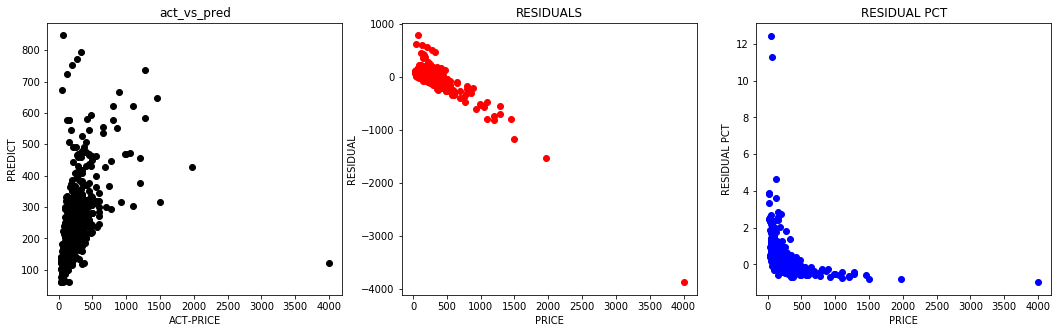

In [50]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.scatter(y_test, y_pred,  color='black')
ax1.set_title('act_vs_pred')
ax1.set_xlabel('ACT-PRICE')
ax1.set_ylabel('PREDICT')

ax2.scatter(dfpred.price,dfpred.rf_resid, color='red')
ax2.set_title('RESIDUALS')
ax2.set_xlabel('PRICE')
ax2.set_ylabel('RESIDUAL')

ax3.scatter(dfpred.price,dfpred.rf_residpct, color='blue')
ax3.set_title('RESIDUAL PCT')
ax3.set_xlabel('PRICE')
ax3.set_ylabel('RESIDUAL PCT')

# GRADIENT BOOST TUNING

In [51]:
# Gradient Hyper Parameter Grid - Random

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# Learning Rate
alpha = [float(x) for x in np.linspace(start = 0.01, stop = 0.1, num = 5)]
# Create the random grid


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': alpha}


In [52]:
print(random_grid)

{'learning_rate': [0.01, 0.0325, 0.05500000000000001, 0.0775, 0.1], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}


print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [53]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
gbreg = GradientBoostingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gbreg_random = RandomizedSearchCV(estimator = gbreg, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gbreg_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=200, min_samples_split=5, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=50 
[CV] n_estimators=200, min_samples_split=5, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=50 
[CV] n_estimators=200, min_samples_split=5, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=50 
[CV] n_estimators=200, min_samples_split=10, learning_rate=0.01, min_samples_leaf=2, max_features=sqrt, max_depth=50 
[CV] n_estimators=200, min_samples_split=10, learning_rate=0.01, min_samples_leaf=2, max_features=sqrt, max_depth=50 
[CV] n_estimators=200, min_samples_split=10, learning_rate=0.01, min_samples_leaf=2, max_features=sqrt, max_depth=50 
[CV] n_estimators=200, min_samples_split=10, learning_rate=0.05500000000000001, min_samples_leaf=4, max_features=sqrt, max_depth=60 
[CV] n_estimators=200, min_samples_split=10, learning_rate=0.05500000000000001, min_samples_l

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.1s


[CV]  n_estimators=1800, min_samples_split=10, learning_rate=0.05500000000000001, min_samples_leaf=4, max_features=sqrt, max_depth=70, total=  10.2s
[CV] n_estimators=2000, min_samples_split=5, learning_rate=0.01, min_samples_leaf=2, max_features=auto, max_depth=50 
[CV]  n_estimators=1400, min_samples_split=5, learning_rate=0.01, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  17.3s
[CV] n_estimators=2000, min_samples_split=5, learning_rate=0.01, min_samples_leaf=2, max_features=auto, max_depth=50 
[CV]  n_estimators=600, min_samples_split=5, learning_rate=0.0775, min_samples_leaf=2, max_features=auto, max_depth=110, total=  27.0s
[CV] n_estimators=2000, min_samples_split=5, learning_rate=0.01, min_samples_leaf=2, max_features=auto, max_depth=50 
[CV]  n_estimators=600, min_samples_split=5, learning_rate=0.0775, min_samples_leaf=2, max_features=auto, max_depth=110, total=  26.3s
[CV] n_estimators=800, min_samples_split=10, learning_rate=0.1, min_samples_leaf=2, max_featur

[CV] n_estimators=1400, min_samples_split=2, learning_rate=0.05500000000000001, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=10, learning_rate=0.0325, min_samples_leaf=2, max_features=sqrt, max_depth=70, total=   8.5s
[CV] n_estimators=1400, min_samples_split=2, learning_rate=0.05500000000000001, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=10, learning_rate=0.0325, min_samples_leaf=2, max_features=sqrt, max_depth=70, total=   8.3s
[CV] n_estimators=1400, min_samples_split=10, learning_rate=0.1, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=2000, min_samples_split=5, learning_rate=0.01, min_samples_leaf=2, max_features=auto, max_depth=50, total= 1.4min
[CV] n_estimators=1400, min_samples_split=10, learning_rate=0.1, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=1200, min_samples_split=10, learning_rate=0.05500000000000001, min_sam

[CV] n_estimators=1200, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=2, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1200, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=2, max_features=sqrt, max_depth=50, total=  12.3s
[CV] n_estimators=1200, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=2, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1200, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=2, max_features=sqrt, max_depth=50, total=  12.2s
[CV] n_estimators=1200, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=2, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1600, min_samples_split=5, learning_rate=0.0325, min_samples_leaf=2, max_features=auto, max_depth=40, total= 1.1min
[CV] n_estimators=1800, min_samples_split=2, learning_rate=0.05500000000000001, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=2, max_features=s

[CV] n_estimators=1600, min_samples_split=2, learning_rate=0.1, min_samples_leaf=1, max_features=auto, max_depth=None 
[CV]  n_estimators=800, min_samples_split=10, learning_rate=0.05500000000000001, min_samples_leaf=4, max_features=sqrt, max_depth=60, total=   4.6s
[CV] n_estimators=600, min_samples_split=2, learning_rate=0.1, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=2, learning_rate=0.1, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=600, min_samples_split=2, learning_rate=0.1, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=2, learning_rate=0.1, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=600, min_samples_split=2, learning_rate=0.1, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=600, min_samples_split=2, learning_rate=0.1, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.1min


[CV]  n_estimators=600, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=  11.5s
[CV] n_estimators=1200, min_samples_split=5, learning_rate=0.1, min_samples_leaf=1, max_features=auto, max_depth=60 
[CV]  n_estimators=400, min_samples_split=10, learning_rate=0.0775, min_samples_leaf=1, max_features=auto, max_depth=40, total=  15.0s
[CV] n_estimators=1200, min_samples_split=5, learning_rate=0.1, min_samples_leaf=1, max_features=auto, max_depth=60 
[CV]  n_estimators=400, min_samples_split=10, learning_rate=0.0775, min_samples_leaf=1, max_features=auto, max_depth=40, total=  15.3s
[CV] n_estimators=1200, min_samples_split=10, learning_rate=0.05500000000000001, min_samples_leaf=1, max_features=sqrt, max_depth=110 
[CV]  n_estimators=400, min_samples_split=10, learning_rate=0.0775, min_samples_leaf=1, max_features=auto, max_depth=40, total=  15.1s
[CV] n_estimators=1200, min_samples_split=10, learning_rate=0.05500000000000001, min_samples

[CV]  n_estimators=2000, min_samples_split=5, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=40, total= 1.1min
[CV] n_estimators=800, min_samples_split=5, learning_rate=0.0325, min_samples_leaf=4, max_features=sqrt, max_depth=100 
[CV]  n_estimators=1200, min_samples_split=10, learning_rate=0.01, min_samples_leaf=2, max_features=sqrt, max_depth=90, total=   8.4s
[CV] n_estimators=800, min_samples_split=5, learning_rate=0.0325, min_samples_leaf=4, max_features=sqrt, max_depth=100 
[CV]  n_estimators=1200, min_samples_split=10, learning_rate=0.01, min_samples_leaf=2, max_features=auto, max_depth=50, total=  43.4s
[CV] n_estimators=800, min_samples_split=5, learning_rate=0.0325, min_samples_leaf=4, max_features=sqrt, max_depth=100 
[CV]  n_estimators=800, min_samples_split=5, learning_rate=0.0325, min_samples_leaf=4, max_features=sqrt, max_depth=100, total=   4.9s
[CV] n_estimators=1200, min_samples_split=10, learning_rate=0.0775, min_samples_leaf=4, max_features=s

[CV] n_estimators=1600, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=2, learning_rate=0.05500000000000001, min_samples_leaf=1, max_features=sqrt, max_depth=80, total=  16.9s
[CV] n_estimators=800, min_samples_split=2, learning_rate=0.1, min_samples_leaf=1, max_features=sqrt, max_depth=90 
[CV]  n_estimators=1200, min_samples_split=2, learning_rate=0.05500000000000001, min_samples_leaf=1, max_features=sqrt, max_depth=80, total=  16.1s
[CV] n_estimators=800, min_samples_split=2, learning_rate=0.1, min_samples_leaf=1, max_features=sqrt, max_depth=90 
[CV]  n_estimators=1600, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   9.8s
[CV] n_estimators=800, min_samples_split=2, learning_rate=0.1, min_samples_leaf=1, max_features=sqrt, max_depth=90 
[CV]  n_estimators=1600, min_samples_split=2, learning_rate=0.0325, min_samples_leaf=4, max_featu

[CV] n_estimators=2000, min_samples_split=2, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=2000, min_samples_split=2, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=70, total= 1.2min
[CV] n_estimators=2000, min_samples_split=2, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=2000, min_samples_split=2, learning_rate=0.0775, min_samples_leaf=4, max_features=auto, max_depth=70, total= 1.1min
[CV] n_estimators=1800, min_samples_split=2, learning_rate=0.01, min_samples_leaf=4, max_features=sqrt, max_depth=50 
[CV]  n_estimators=1400, min_samples_split=10, learning_rate=0.0775, min_samples_leaf=4, max_features=sqrt, max_depth=80, total=   7.9s
[CV] n_estimators=1800, min_samples_split=2, learning_rate=0.01, min_samples_leaf=4, max_features=sqrt, max_depth=50 
[CV]  n_estimators=800, min_samples_split=10, learning_rate=0.0775, min_samples_leaf=1, max_features=auto, max_dep

[CV]  n_estimators=600, min_samples_split=10, learning_rate=0.01, min_samples_leaf=4, max_features=auto, max_depth=None, total=  18.9s
[CV] n_estimators=1000, min_samples_split=2, learning_rate=0.01, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=10, learning_rate=0.01, min_samples_leaf=4, max_features=auto, max_depth=None, total=  19.3s
[CV] n_estimators=1000, min_samples_split=2, learning_rate=0.01, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1400, min_samples_split=10, learning_rate=0.05500000000000001, min_samples_leaf=2, max_features=auto, max_depth=60, total=  48.0s
[CV] n_estimators=1000, min_samples_split=2, learning_rate=0.01, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1400, min_samples_split=10, learning_rate=0.05500000000000001, min_samples_leaf=2, max_features=auto, max_depth=60, total=  48.1s
[CV] n_estimators=1400, min_samples_split=10, learning_rate=0.0775, min_sample

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.4min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'learning_rate': [0.01, 0.0325, 0.05500000000000001, 0.0775, 0.1], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return

In [54]:
#Best Parameters based on the the above search
gbreg_random.best_params_

{'learning_rate': 0.01,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 400}

In [55]:
#EVALUATE THE RANDOM SEARCH BEST PARAMETERS

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    rfcv_score = model.score(test_features, test_labels)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('RF Score = {:0.2f}.'.format(rfcv_score))
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("My R2 Score is : ",my_metric(test_labels,predictions))
    return accuracy

In [56]:
# base_model = GradientBoostingRegressor(n_estimators = 10, random_state = 42)
base_model = GradientBoostingRegressor(**params)
base_model.fit(X_train, y_train)
print('********************* BASE MODEL Performance *********************')
base_accuracy = evaluate(base_model, X_test, y_test)



best_random = gbreg_random.best_estimator_
print('********************* RANDOM MODEL Performance *********************')
random_accuracy = evaluate(best_random, X_test, y_test)

********************* BASE MODEL Performance *********************
Model Performance
RF Score = 0.24.
Average Error: 85.3836
Accuracy = 51.60%.
My R2 Score is :  0.23576561207961189
********************* RANDOM MODEL Performance *********************
Model Performance
RF Score = 0.27.
Average Error: 82.5978
Accuracy = 56.49%.
My R2 Score is :  0.2724196020065044


In [57]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 9.47%.


In [56]:
# GRID SEARCH WITH CROSS VALIDATION

In [57]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [70, 80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 500, 1000, 1400, 1750, 2000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [58]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 900 candidates, totalling 2700 fits
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=100, max_features=2, min_samples_sp

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.8s


[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   2.2s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   4.6s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   3.1s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   3.1s
[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=100, max_features=2, min_sa

[CV] n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.8s
[CV] n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   4.2s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.8s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   2.5s
[CV] n_estimators=2000, max_features=2, min_samples

[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   3.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   3.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.8s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.8s
[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min

[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.3s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.3s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.6s
[CV] n_estimators=1750, max_features=2, min_sa

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.2s


[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.3s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.3s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.2s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.7s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min

[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.1s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.1s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   1.5s
[CV] n_estimators=1750, max_features=2, min_sam

[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   2.7s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   2.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.1s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=2, min_sampl

[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   2.6s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   2.7s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_sa

[CV] n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   1.2s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   4.2s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   1.2s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   1.2s
[CV] n_estimators=1400, max_features=3, min_sampl

[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   0.2s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.0s
[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   1.0s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=70, total=   3.9s
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1750, max_features=3, min_samples_spl

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min


[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   2.8s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   2.8s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min_samp

[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.9s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   2.6s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   2.6s
[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_s

[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   3.7s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   1.9s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70, total=   2.6s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=70 
[CV]  n_estimators=1400, max_features=3, min

[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.6s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   1.8s
[CV] n_estimators=2000, max_features=3, min_s

[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.5s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=70, total=   3.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samp

[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   3.4s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   3.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=70, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_s

[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   1.1s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   4.0s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   4.6s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   4.6s
[CV] n_estimators=1750, max_features=2, min_samp

[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   3.7s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   3.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples

[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   3.1s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   3.2s
[CV] n_estimators=1400, max_features=2, min_sam

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.2min


[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   3.5s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   3.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   3.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1000, max_features=2, min_

[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   2.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   3.4s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   3.3s
[CV] n_estimators=1750, max_features=2, min_samp

[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   2.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   2.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=2000, max_features=2, min_samples

[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   2.7s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   2.7s
[CV] n_estimators=1400, max_features=2, min_sam

[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   2.6s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   2.7s
[CV] n_estimators=1000, max_features=2, min_sample

[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   0.3s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   0.3s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   2.7s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   2.6s
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1750, max_features=2, min_samples_sp

[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   3.3s
[CV] n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   0.2s
[CV] n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=80 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=80, total=   4.1s
[CV] n_estimators=500, max_features=3, min_samples

[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   2.8s
[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.2s
[CV] n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   0.2s
[CV] n_estimators=500, max_features=3, min_samples_s

[CV]  n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   2.7s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   2.7s
[CV] n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=80, total=   2.7s
[CV] n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_

[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   1.8s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   2.5s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   2.5s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   0.2s
[CV] n_estimators=100, max_features=3, min_sam

[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=80, total=   3.6s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   1.8s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   2.5s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_sample

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.0min


[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   3.6s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   1.8s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   2.4s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   2.5s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80 
[CV]  n_estimators=100, max_features=3, min_sa

[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=80, total=   3.5s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   1.7s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   2.4s
[CV] n_estimators=2000, max_features=3, min_samples

[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   3.4s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   1.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=80, total=   3.4s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=80 
[CV]  n_estimators=1000, max_features=3, min

[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   4.6s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   4.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   2.2s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   2.2s
[CV] n_estimators=1750, max_features=2, min_sa

[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   0.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   3.8s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   4.3s
[CV] n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   4.3s
[CV] n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1000, max_features=2, min_sampl

[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   3.1s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   3.1s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   0.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   3.6s
[CV] n_estimators=1400, max_features=2, min_s

[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   2.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   2.9s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   0.8s
[CV] n_estimators=1400, max_features=2, min_samp

[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   2.9s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   2.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_

[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   2.8s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=2, min_sample

[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   2.1s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   0.8s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   2.7s
[CV] n_estimators=1000, max_features=2, min_samples_

[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   0.3s
[CV] n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   2.2s
[CV] n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   0.3s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   0.3s
[CV] n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1750, max_features=2, min_samples_split

[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   3.3s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=90, total=   3.3s
[CV] n_estimators=500, max_features=3, min_sample

[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   2.8s
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   2.8s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=100, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   0.2s
[CV] n_estimators=100, max_features=3, min_samples_s

[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  7.2min


[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   1.0s
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   3.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   3.9s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90, total=   1.9s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=90 
[CV]  n_estimators=2000, max_features=3, min_

[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   3.3s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   3.7s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=90 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   3.7s
[CV] n_estimators=1750, max_features=3, min_samp

[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.9s
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   3.2s
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=90, total=   3.3s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=2000, max_features=3, min_samples

[CV] n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.9s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   0.9s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   3.1s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=90, total=   3.1s
[CV] n_estimators=1400, max_features=3, min_sam

[CV] n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   3.0s
[CV] n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   0.8s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   0.9s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=90 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   3.0s
[CV] n_estimators=1000, max_features=3, min_sample

[CV]  n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   3.0s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=90, total=   3.0s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samp

[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   3.1s
[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   3.8s
[CV] n_estimators=500, max_features=2, min

[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.5s
[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min

[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.5s
[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.5s
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.5s
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   0.2s
[CV] n_estimators=100, max_features=2, min

[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   1.6s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   3.4s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   2.4s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   2.3s
[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=100, max_features=2

[CV] n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   3.2s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.6s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   2.2s
[CV] n_estimators=2000, max_features=2, min

[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.1s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.5s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.1s
[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_feature

[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.0s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.0s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   1.5s
[CV] n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.1s
[CV] n_estimators=1750, max_features=2,

[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.0s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.1s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   1.2s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=2000, max_features=2, min_samples_split

[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   4.0s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   4.1s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   4.7s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=100, total=   1.1s
[CV] n_estimators=1400, max_features=

[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   1.0s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   1.0s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   3.6s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   3.6s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=500, max_features=3, 

[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  9.8min


[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.0s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   4.0s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.7s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   2.8s
[CV] n_estimators=100, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100 
[CV]  n_estimators=100, max_features=3

[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   1.9s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=100, total=   3.9s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   1.9s
[CV] n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   2.6s
[CV] n_estimators=2000, max_features=3, min

[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   3.6s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   1.8s
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=100, total=   3.7s
[CV] n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=100 
[CV]  n_estimators=1000, max_feature

[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.6s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   1.8s
[CV] n_estimators=1750, max_features=3

[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.1s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.5s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=100, total=   3.4s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=1000, max_features=3, m

[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.0s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.0s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=100 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=100, total=   3.4s
[CV]  n_estimators=2000, max_features

[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   1.1s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   1.1s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   4.0s
[CV] n_estimators=1000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   1.1s
[CV] n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=1750, max_features=2,

[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   3.7s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   0.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   0.9s
[CV] n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   3.7s
[CV] n_estimators=1000, max_features=2, min_sa

[CV]  n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   2.5s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1750, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   3.1s
[CV] n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   0.9s
[CV]  n_estimators=500, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   0.9s
[CV] n_estimators=1000, max

[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   2.3s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   0.2s
[CV] n_estimators=500, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1750, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   2.9s
[CV] n_estimators=500, max_features=2, min_s

[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   2.3s
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   2.3s
[CV] n_estimators=500, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samp

[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   2.2s
[CV] n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   2.2s
[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   0.2s
[CV] n_estimators=100, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   2.2s
[CV] n_estimators=100, max_features=2, 

[CV]  n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.2s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   1.5s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   2.1s
[CV]  n_estimators=1400, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   2.1s
[CV] n_estimators=2000, max_features=2, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV] n_estimators=100, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=100, max_features=2, min

[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   1.6s
[CV] n_estimators=1750, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=2000, max_features=2, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   3.0s
[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   1.5s
[CV] n_estimators=2000, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1400, max_features=2, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   2.2s
[CV] n_estimators=2000, max_features

[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   4.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   2.3s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   2.3s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   2.3s
[CV] n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=1, max_depth=110 
[CV]  n_estimators=2000, max_features

[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   4.5s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=1, max_depth=110, total=   4.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   2.0s
[CV] n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   2.1s
[CV] n_estimators=1750, max_features=3, mi

[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   3.4s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   1.0s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   3.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=2, max_depth=110, total=   4.0s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=2, max_depth=110 
[CV]  n_estimators=1000, max_features

[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   3.3s
[CV] n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1750, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   3.2s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   3.7s
[CV] n_estimators=1400, max_features=3, 

[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 12.8min


[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   3.7s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   3.7s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   1.9s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110, total=   1.8s
[CV] n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=3, max_depth=110 
[CV]  n_estimators=1000, max_feature

[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.5s
[CV] n_estimators=1400, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.5s
[CV] n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110 
[CV]  n_estimators=1000, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   1.8s
[CV] n_estimators=1750, max_features=3,

[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.1s
[CV] n_estimators=1000, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1750, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.1s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   0.9s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=2000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=4, max_depth=110, total=   3.5s
[CV] n_estimators=1400, max_features=3, min_samples_split=8, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=2000, max_features=3, m

[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   0.8s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   3.0s
[CV] n_estimators=1000, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=1750, max_features=3, min_samples_split=10, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   3.0s
[CV] n_estimators=1400, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110 
[CV]  n_estimators=500, max_features=3, min_samples_split=12, bootstrap=True, min_samples_leaf=5, max_depth=110, total=   0.9s
[CV] n_estimators=1400, max_features=3

[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed: 13.4min finished


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 500}

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'n_estimators': 100}

In [60]:
best_grid = grid_search.best_estimator_
print('********************* GRID SEARCH MODEL Performance *********************')
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
RF Score = 0.40.
Average Error: 65.7862
Accuracy = 65.81%.
